#Base

In [3]:
from google.colab import files

uploaded = files.upload()

Saving example_g1e.csv to example_g1e.csv


In [29]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

# ---------------------------------------
# 1. Vector 연산
# ---------------------------------------
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([7, 8, 9, 10, 11, 12])

print("x + y:", x + y)
print("x * y:", x * y)
print("sqrt(x):", np.sqrt(x))
print("sum(x):", np.sum(x))
print("diff(x):", np.diff(x))
print("mean(x):", np.mean(x))
print("var(x):", np.var(x, ddof=1))
print("std(x):", np.std(x, ddof=1))
print("median(x):", np.median(x))
print("IQR:", np.percentile(x, 75) - np.percentile(x, 25))
print("max(x):", np.max(x))
print("argmax(x) (1-based):", np.argmax(x)+1)
print("element-wise max:", np.maximum(x, y))
print("length(x):", len(x))

# ---------------------------------------
# 2. Slice / 조건 / np.where
# ---------------------------------------
print("2번째 요소:", x[1])
print("2번째 제외:", np.delete(x, 1))
print("1~3번째:", x[0:3])
print("선택적 요소:", x[[0,2,3,4,5]])
print("x >= 4:", x >= 4)
print("sum(x >= 4):", np.sum(x >= 4))
print("x[x>=4]:", x[x >= 4])
print("sum of selected:", np.sum(x[x >= 4]))
print("isin [1,3,5]:", np.isin(x, [1,3,5]))
print("selected elements:", x[np.isin(x, [1,3,5])])

y2 = np.where(x >= 4, "Yes", "No")
print("np.where:", y2)

# ---------------------------------------
# 3. Vector 생성
# ---------------------------------------
v1 = np.arange(-5, 5.2, 0.2)
v2 = np.repeat(1, 3)
v3 = np.tile([1,2,3], 2)
v4 = np.repeat([1,2,3], 2)

# ---------------------------------------
# 4. for, if/else, function
# ---------------------------------------
for i in range(1,4):
    print("i:", i)

i_sum = 0
for j in [1,2,4,5,6]:
    i_sum += j
print("sum:", i_sum)

x_val = 5
if x_val >= 3:
    x_val += 3
print("if x>=3:", x_val)

if x_val >= 10:
    print("High")
elif x_val >= 5:
    print("Medium")
else:
    print("Low")

def mean0(arr):
    return np.nanmean(arr)

arr = np.array([1,2,3,4,5,6,7,8,9,10,12,13,np.nan,np.nan,15,17])
print("nanmean:", mean0(arr))

def twomean(a,b):
    return (a+b)/2
print("twomean:", twomean(4,6))

# ---------------------------------------
# 5. 행렬 연산
# ---------------------------------------
mat = np.arange(1,21).reshape(4,5)
print("Matrix:\n", mat)
print("행 평균:", np.mean(mat, axis=1))
print("행 합:", np.sum(mat, axis=1))
print("열 평균:", np.mean(mat, axis=0))

# ---------------------------------------
# 6. Pandas: CSV 읽기 / 기본 확인
# ---------------------------------------
ex = pd.read_csv("example_g1e.csv")
print(ex.head())
print(ex.tail())
print(ex.info())
print(ex.shape)
print(ex.columns)
print(ex.describe())

# ---------------------------------------
# 7. 변수 확인 / 새 변수 생성
# ---------------------------------------
print(ex["EXMD_BZ_YYYY"].unique())
print(ex["EXMD_BZ_YYYY"].value_counts())

ex["BMI_cat"] = (ex["BMI"] >= 25).astype(int)
print(ex["BMI_cat"].value_counts())

# ---------------------------------------
# 8. Group by
# ---------------------------------------
print(ex.groupby("Q_PHX_DX_HTN")[["WSTC","BMI"]].mean())
print(ex.groupby(["Q_PHX_DX_HTN","Q_PHX_DX_DM"])[["WSTC","BMI"]].mean())

# ---------------------------------------
# 9. Sort
# ---------------------------------------
ex1 = ex.dropna()
ex1_sorted = ex1.sort_values("HGHT")
print(ex1_sorted.head())

# ---------------------------------------
# 10. Reshape: wide <-> long
# ---------------------------------------
long = pd.melt(ex1, id_vars=["EXMD_BZ_YYYY","RN_INDI"],
               value_vars=["BP_SYS","BP_DIA"],
               var_name="BP_type", value_name="BP")
print(long.head())

wide = long.pivot_table(index=["EXMD_BZ_YYYY","RN_INDI"],
                        columns="BP_type", values="BP").reset_index()
print(wide.head())

# ---------------------------------------
# 11. Merge
# ---------------------------------------
# 컬럼명으로 나누기 (인덱스보다 안전)
ex1_Q = ex1.iloc[:, list(range(0, 12))]                        # 0~11열
ex1_measure = ex1.iloc[:, [0, 1, 2] + list(range(12, ex1.shape[1]))]
ex1_merge = ex1_Q.merge(ex1_measure, on=list(ex1.columns[:3]), how="outer")

print(ex1_merge.head())


x + y: [ 8 10 12 14 16 18]
x * y: [ 7 16 27 40 55 72]
sqrt(x): [1.         1.41421356 1.73205081 2.         2.23606798 2.44948974]
sum(x): 21
diff(x): [1 1 1 1 1]
mean(x): 3.5
var(x): 3.5
std(x): 1.8708286933869707
median(x): 3.5
IQR: 2.5
max(x): 6
argmax(x) (1-based): 6
element-wise max: [ 7  8  9 10 11 12]
length(x): 6
2번째 요소: 2
2번째 제외: [1 3 4 5 6]
1~3번째: [1 2 3]
선택적 요소: [1 3 4 5 6]
x >= 4: [False False False  True  True  True]
sum(x >= 4): 3
x[x>=4]: [4 5 6]
sum of selected: 15
isin [1,3,5]: [ True False  True False  True False]
selected elements: [1 3 5]
np.where: ['No' 'No' 'No' 'Yes' 'Yes' 'Yes']
i: 1
i: 2
i: 3
sum: 18
if x>=3: 8
Medium
nanmean: 8.0
twomean: 5.0
Matrix:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]
행 평균: [ 3.  8. 13. 18.]
행 합: [15 40 65 90]
열 평균: [ 8.5  9.5 10.5 11.5 12.5]
   EXMD_BZ_YYYY  RN_INDI  HME_YYYYMM  Q_PHX_DX_STK  Q_PHX_DX_HTDZ  \
0          2009   562083      200909           0.0            0.0   
1          2009   334536   

In [28]:
ex1_measure

,Q_PHX_DX_STK,Q_PHX_DX_HTDZ,Q_PHX_DX_HTN,Q_PHX_DX_DM,Q_PHX_DX_DLD,Q_PHX_DX_PTB,Q_HBV_AG,Q_SMK_YN,Q_DRK_FRQ_V09N,WSTC,...,VA_RT,URN_PROT,HGB,FBS,TOT_CHOL,CRTN,SGOT,GGT,GFR,BMI_cat
675,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,76,...,0.9,1.0,12.8,107,188,0.9,24,25,69.0,0
676,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,87,...,1.0,1.0,12.3,89,181,0.7,20,17,94.0,1
681,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,79,...,0.4,1.0,13.0,99,239,0.5,25,30,119.0,0
682,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,87,...,1.0,1.0,17.3,110,213,1.0,17,32,91.0,1
683,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,92,...,0.5,1.0,15.1,84,235,1.0,19,47,87.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,98,...,1.0,1.0,15.9,101,171,0.9,29,98,93.0,1
1636,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,96,...,1.0,1.0,14.9,110,204,1.1,37,92,73.0,1
1637,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,92,...,0.6,1.0,15.4,121,186,1.0,25,58,83.0,1
1640,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,88,...,0.7,1.0,14.9,119,106,0.9,101,62,79.0,1


#Data Table

In [4]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv("example_g1e.csv")   # pandas DataFrame
type(df)

# ----------------------------------------------------
# ✅ Row Operations
# ----------------------------------------------------
df.head(10)   # dt[1:10]

df[(df["EXMD_BZ_YYYY"].isin(range(2009, 2013))) & (df["BMI"] >= 25)]

df.sort_values("HME_YYYYMM")
df.sort_values(["HME_YYYYMM", "HGHT"], ascending=[True, False])

(df[(df["EXMD_BZ_YYYY"].isin(range(2009, 2013))) & (df["BMI"] >= 25)]
   .sort_values("HGHT"))

# ----------------------------------------------------
# ✅ Column Operations
# ----------------------------------------------------
df.iloc[:, :10]
df[["HGHT", "WGHT"]]
df[["HGHT", "WGHT"]].rename(columns={"HGHT": "Height", "WGHT": "Weight"})

df["HGHT"]               # Series (vector)
df[["HGHT"]]             # DataFrame

colvars = [c for c in df.columns if c.startswith("Q_")]
df[colvars]
df.drop(columns=colvars)

# ----------------------------------------------------
# ✅ Column Summary
# ----------------------------------------------------
df[["HGHT", "WGHT", "BMI"]].mean()

# ----------------------------------------------------
# ✅ Group By
# ----------------------------------------------------
df.groupby("EXMD_BZ_YYYY")[["HGHT", "WGHT", "BMI"]].mean()

df[df["HGHT"] >= 175].groupby(["EXMD_BZ_YYYY", "Q_SMK_YN"]).size().reset_index(name="N")

df[df["HGHT"] >= 175].groupby(
    (df["EXMD_BZ_YYYY"] >= 2015).map({True: ">=2015", False: "<2015"})
).size()

# ----------------------------------------------------
# ✅ Merge & Joins
# ----------------------------------------------------
dt1 = df.loc[:9, ["EXMD_BZ_YYYY", "RN_INDI", "HME_YYYYMM"] + colvars]
dt2 = df.loc[5:14, df.columns.difference(colvars)]

pd.merge(dt1, dt2, on=["EXMD_BZ_YYYY","RN_INDI","HME_YYYYMM"], how="outer")   # full
pd.merge(dt1, dt2, on=["EXMD_BZ_YYYY","RN_INDI","HME_YYYYMM"], how="inner")   # inner
pd.merge(dt1, dt2, on=["EXMD_BZ_YYYY","RN_INDI","HME_YYYYMM"], how="left")    # left
pd.merge(dt1, dt2, on=["EXMD_BZ_YYYY","RN_INDI","HME_YYYYMM"], how="right")   # right

# anti-join
dt1[~dt1.set_index(["EXMD_BZ_YYYY","RN_INDI","HME_YYYYMM"]).index
        .isin(dt2.set_index(["EXMD_BZ_YYYY","RN_INDI","HME_YYYYMM"]).index)]

# ----------------------------------------------------
# ✅ New Variables
# ----------------------------------------------------
df["BMI2"] = (df["WGHT"] / (df["HGHT"]/100)**2).round(1)
df["BP_SYS140"] = (df["BP_SYS"] >= 140).astype(int).astype("category")
df["BMI25"] = (df["BMI"] >= 25).astype(int).astype("category")

df = df.drop(columns=["BMI2"])   # remove

# ----------------------------------------------------
# ✅ Melt (wide → long), Pivot (long → wide)
# ----------------------------------------------------
dt_long1 = df.melt(
    id_vars=["EXMD_BZ_YYYY","RN_INDI","HME_YYYYMM"],
    value_vars=["TOT_CHOL","TG","HDL","LDL"],
    var_name="Lipid", value_name="Value"
)

# aggregate pivot
dt_wide2 = dt_long1.pivot_table(
    index="RN_INDI", columns="Lipid", values="Value", aggfunc="mean"
).reset_index()

# pivot back
dt_wide1 = dt_long1.pivot(
    index=["EXMD_BZ_YYYY","RN_INDI","HME_YYYYMM"], columns="Lipid", values="Value"
).reset_index()


#table1

In [6]:
pip install TableOne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00


In [26]:
import pandas as pd
from tableone import TableOne

# 데이터 불러오기
dt = pd.read_csv("example_g1e.csv")

# 변수 지정
myVars = ["HGHT", "WGHT", "BMI", "HDL", "LDL", "TG", "SGPT",
          "Q_PHX_DX_STK", "Q_PHX_DX_HTDZ", "Q_HBV_AG", "Q_SMK_YN"]
catVars = ["Q_PHX_DX_STK", "Q_PHX_DX_HTDZ", "Q_HBV_AG", "Q_SMK_YN"]

# 전체 데이터 요약
t1 = TableOne(data=dt, columns=myVars, categorical=catVars, groupby=None, missing=True)
print(t1)

# 그룹별 요약 (Q_SMK_YN 기준)
t2 = TableOne(data=dt, columns=myVars, categorical=catVars, groupby="Q_SMK_YN", smd=True, missing=False)
print(t2)

# TableOne -> DataFrame 변환
table1_df = pd.DataFrame.from_records(t2.tableone)  # tableone 속성 사용
table1_df.to_csv("table1.csv", index=False)


                          Missing        Overall
n                                           1644
HGHT, mean (SD)                 0    164.5 (9.2)
WGHT, mean (SD)                 0    65.1 (12.5)
BMI, mean (SD)                  0     23.9 (3.4)
HDL, mean (SD)                  0    55.9 (19.5)
LDL, mean (SD)                 16  118.7 (202.0)
TG, mean (SD)                   0  134.9 (104.8)
SGPT, mean (SD)                 0    26.0 (27.2)
Q_PHX_DX_STK, n (%)  0.0             1059 (64.4)
                     1.0                12 (0.7)
                     None             573 (34.9)
Q_PHX_DX_HTDZ, n (%) 0.0             1052 (64.0)
                     1.0                26 (1.6)
                     None             566 (34.4)
Q_HBV_AG, n (%)      1.0                77 (4.7)
                     2.0             1102 (67.0)
                     3.0              463 (28.2)
                     None                2 (0.1)
Q_SMK_YN, n (%)      1.0              995 (60.5)
                    

/tmp/ipython-input-1552089034.py:21: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  table1_df = pd.DataFrame.from_records(t2.tableone)  # tableone 속성 사용


In [9]:
import pandas as pd
import numpy as np
from scipy import stats

# 데이터 불러오기
df = pd.read_csv("example_g1e.csv")

# 변수 지정
myVars = ["HGHT", "WGHT", "BMI", "HDL", "LDL", "TG", "SGPT",
          "Q_PHX_DX_STK", "Q_PHX_DX_HTDZ", "Q_HBV_AG", "Q_SMK_YN"]
catVars = ["Q_PHX_DX_STK", "Q_PHX_DX_HTDZ", "Q_HBV_AG", "Q_SMK_YN"]
contVars = [v for v in myVars if v not in catVars]

# -----------------------------
# 1. 연속형 요약 함수
# -----------------------------
def summarize_cont(series):
    series = series.dropna()
    if len(series) == 0:
        return np.nan
    # 정규성 검정
    p_norm = stats.shapiro(series)[1] if len(series) >= 3 else 1
    if p_norm > 0.05:  # 정규분포 → mean(sd)
        return f"{series.mean():.2f} ({series.std():.2f})"
    else:  # 비정규분포 → median (IQR)
        q1, q3 = np.percentile(series, [25, 75])
        return f"{series.median():.2f} ({q1:.2f}–{q3:.2f})"

# -----------------------------
# 2. 범주형 요약 함수
# -----------------------------
def summarize_cat(series):
    counts = series.value_counts(dropna=False)
    total = counts.sum()
    summary = []
    for k, v in counts.items():
        perc = v / total * 100
        summary.append(f"{k}: {v} ({perc:.1f}%)")
    return "; ".join(summary)

# -----------------------------
# 3. 그룹별 요약
# -----------------------------
def make_table(df, group=None):
    results = {}
    if group is None:
        grouped = [("전체", df)]
    else:
        grouped = df.groupby(group)

    for gname, gdata in grouped:
        res = {}
        for v in contVars:
            res[v] = summarize_cont(gdata[v])
        for v in catVars:
            res[v] = summarize_cat(gdata[v])
        results[gname] = res

    return pd.DataFrame(results)

# -----------------------------
# 4. 통계적 검정 (groupby 있을 때)
# -----------------------------
def compare_groups(df, group):
    pvals = {}
    groups = [g for _, g in df.groupby(group)]
    for v in contVars:
        # 정규성 판단 → ANOVA vs Kruskal-Wallis
        normal = all(stats.shapiro(g[v].dropna())[1] > 0.05 for g in groups if len(g[v].dropna()) >= 3)
        if normal:
            _, p = stats.f_oneway(*(g[v].dropna() for g in groups))
        else:
            _, p = stats.kruskal(*(g[v].dropna() for g in groups))
        pvals[v] = p
    for v in catVars:
        table = pd.crosstab(df[group], df[v])
        if table.shape == (2, 2):
            _, p = stats.fisher_exact(table)
        else:
            _, p, _, _ = stats.chi2_contingency(table)
        pvals[v] = p
    return pd.Series(pvals, name="p-value")

# -----------------------------
# 실행 예시
# -----------------------------
# 전체 요약
t1 = make_table(df)
print("전체 요약:")
print(t1)

# 그룹별 요약 (예: 흡연여부 Q_SMK_YN)
t2 = make_table(df, group="Q_SMK_YN")
print("\n그룹별 요약:")
print(t2)

# p-value 계산
pvals = compare_groups(df, group="Q_SMK_YN")
print("\n통계적 검정 결과:")
print(pvals)

# CSV 저장
final_table = t2.T.join(pvals)
#final_table.to_csv("table1_custom.csv")


전체 요약:
                                                              전체
HGHT                                      165.00 (158.00–171.00)
WGHT                                         64.00 (56.00–73.00)
BMI                                          23.70 (21.50–26.20)
HDL                                          54.00 (46.00–64.00)
LDL                                        112.00 (90.00–134.00)
TG                                         106.00 (72.00–163.00)
SGPT                                         20.00 (15.00–30.00)
Q_PHX_DX_STK   0.0: 1059 (64.4%); nan: 573 (34.9%); 1.0: 12 (...
Q_PHX_DX_HTDZ  0.0: 1052 (64.0%); nan: 566 (34.4%); 1.0: 26 (...
Q_HBV_AG       2.0: 1102 (67.0%); 3.0: 463 (28.2%); 1.0: 77 (...
Q_SMK_YN       1.0: 995 (60.5%); 3.0: 391 (23.8%); 2.0: 256 (...

그룹별 요약:
                                                             1.0  \
HGHT                                      160.00 (155.00–166.00)   
WGHT                                         60.00 (53.00–68.00)   


#Plot

In [11]:
pip install statannot

In [14]:
pip install python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 15.6 MB/s eta 0:00:00


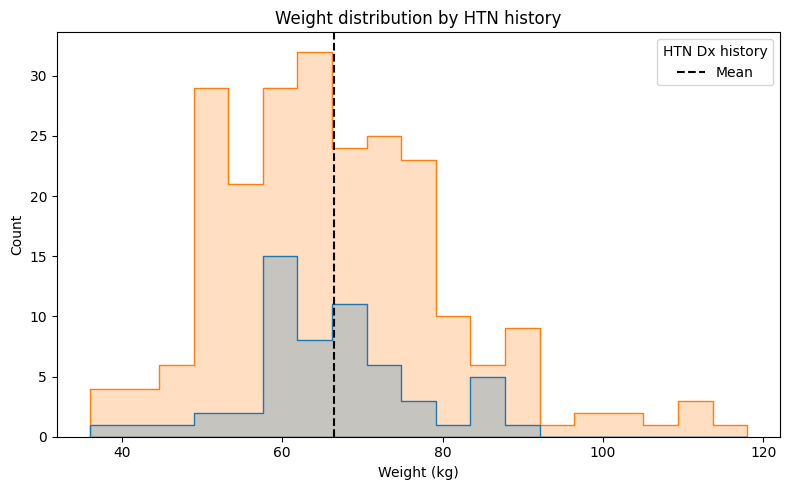

/tmp/ipython-input-346227726.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_done, x="HTN", y="WGHT", palette="Set2")


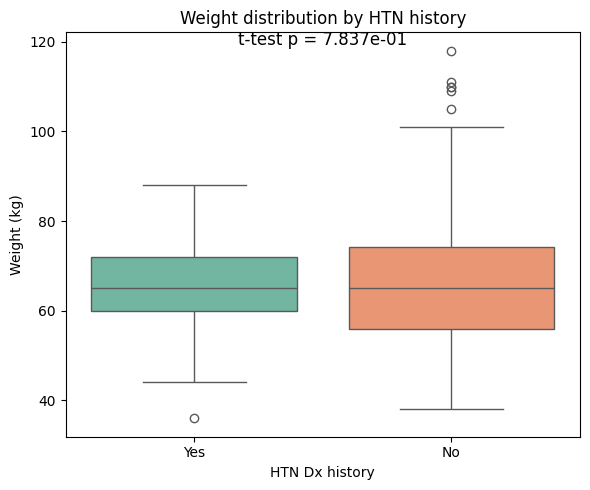

/tmp/ipython-input-346227726.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_done, x="SMK", y="WGHT", palette="Set2")


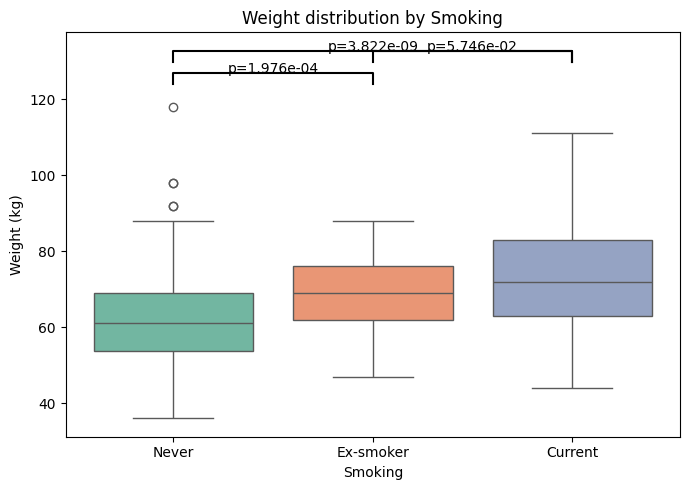

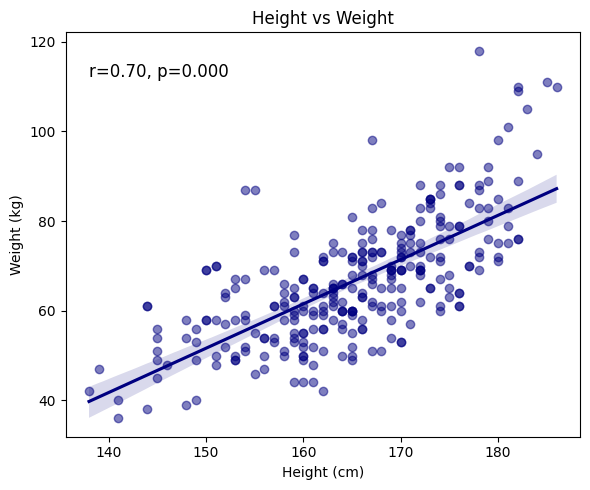

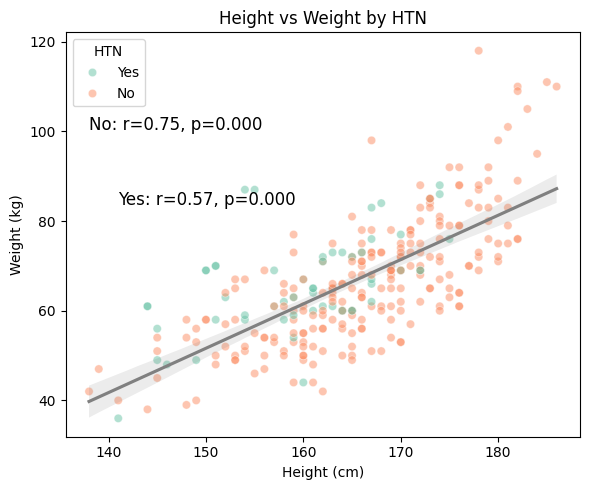

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pptx import Presentation
from pptx.util import Inches

# ------------------------------
# 0. 데이터 불러오기 & 전처리
# ------------------------------
df = pd.read_csv("example_g1e.csv")

# 연도 필터 + NA 제거
df_done = df[df["EXMD_BZ_YYYY"].isin([2009, 2015])].dropna(subset=["Q_PHX_DX_HTN","Q_PHX_DX_DM"])

# 고혈압 여부
df_done["HTN"] = df_done["Q_PHX_DX_HTN"].apply(lambda x: "Yes" if x==1 else "No")

# 흡연 그룹
df_done["SMK"] = df_done["Q_SMK_YN"].map({1:"Never", 2:"Ex-smoker", 3:"Current"})

# ------------------------------
# 1. Histogram (by HTN)
# ------------------------------
plt.figure(figsize=(8,5))
sns.histplot(data=df_done, x="WGHT", hue="HTN", element="step", stat="count", kde=False)
plt.axvline(df_done["WGHT"].mean(), color="black", linestyle="--", label="Mean")
plt.title("Weight distribution by HTN history")
plt.xlabel("Weight (kg)")
plt.legend(title="HTN Dx history")
plt.tight_layout()
plt.savefig("plot1.png")
plt.show()

# ------------------------------
# 2. Boxplot (HTN vs Weight, t-test)
# ------------------------------
plt.figure(figsize=(6,5))
ax = sns.boxplot(data=df_done, x="HTN", y="WGHT", palette="Set2")
plt.title("Weight distribution by HTN history")
plt.xlabel("HTN Dx history")
plt.ylabel("Weight (kg)")

# t-test 직접 계산
group_yes = df_done[df_done["HTN"]=="Yes"]["WGHT"]
group_no = df_done[df_done["HTN"]=="No"]["WGHT"]
t_stat, p_val = stats.ttest_ind(group_yes, group_no, nan_policy="omit")

# p-value 텍스트 추가
y_max = df_done["WGHT"].max()
plt.text(0.5, y_max*1.01, f"t-test p = {p_val:.3e}", ha='center', fontsize=12)
plt.tight_layout()
plt.savefig("plot2.png")
plt.show()

# ------------------------------
# 3. Boxplot (Smoking groups, pairwise t-tests)
# ------------------------------
plt.figure(figsize=(7,5))
ax = sns.boxplot(data=df_done, x="SMK", y="WGHT", palette="Set2")
plt.title("Weight distribution by Smoking")
plt.xlabel("Smoking")
plt.ylabel("Weight (kg)")

# pairwise t-test
smk_groups = ["Never","Ex-smoker","Current"]
y_max = df_done["WGHT"].max()
offset = y_max*0.05
for i in range(len(smk_groups)):
    for j in range(i+1, len(smk_groups)):
        g1 = df_done[df_done["SMK"]==smk_groups[i]]["WGHT"]
        g2 = df_done[df_done["SMK"]==smk_groups[j]]["WGHT"]
        t_stat, p_val = stats.ttest_ind(g1, g2, nan_policy="omit")
        x1, x2 = i, j
        y = y_max + offset*(j)
        plt.plot([x1, x1, x2, x2], [y, y+offset/2, y+offset/2, y], lw=1.5, c='k')
        plt.text((x1+x2)/2, y+offset/2, f"p={p_val:.3e}", ha='center', fontsize=10)
plt.tight_layout()
plt.savefig("plot3.png")
plt.show()

# ------------------------------
# 4. Scatter plot (Height vs Weight + regression + correlation)
# ------------------------------
plt.figure(figsize=(6,5))
sns.regplot(data=df_done, x="HGHT", y="WGHT", scatter_kws={'alpha':0.5}, color="navy")
r, p = stats.pearsonr(df_done["HGHT"], df_done["WGHT"])
plt.text(df_done["HGHT"].min(), df_done["WGHT"].max()*0.95, f"r={r:.2f}, p={p:.3f}", fontsize=12)
plt.title("Height vs Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.tight_layout()
plt.savefig("plot4.png")
plt.show()

# ------------------------------
# 5. Scatter plot (Height vs Weight by HTN)
# ------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_done, x="HGHT", y="WGHT", hue="HTN", alpha=0.5, palette="Set2")
for htn_group, gdata in df_done.groupby("HTN"):
    r, p = stats.pearsonr(gdata["HGHT"], gdata["WGHT"])
    plt.text(gdata["HGHT"].min(), gdata["WGHT"].max()*0.95 if htn_group=="Yes" else gdata["WGHT"].max()*0.85,
             f"{htn_group}: r={r:.2f}, p={p:.3f}", fontsize=12)
sns.regplot(data=df_done, x="HGHT", y="WGHT", scatter=False, color="gray")
plt.title("Height vs Weight by HTN")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.tight_layout()
plt.savefig("plot5.png")
plt.show()

# ------------------------------
# 6. PowerPoint 저장
# ------------------------------
prs = Presentation()
for img in ["plot1.png","plot2.png","plot3.png","plot4.png","plot5.png"]:
    slide = prs.slides.add_slide(prs.slide_layouts[5])  # 빈 슬라이드
    left = Inches(1)
    top = Inches(1)
    slide.shapes.add_picture(img, left, top, width=Inches(6))
#prs.save("plot_file.pptx")


#Analysis

In [19]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=c9d96d91bfd345c898b2cf2fe935155e8ea7c20a7be10c56e5fbd34a6881b8dd
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


/tmp/ipython-input-58212430.py:15: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  m20 = pd.read_csv("nsc2_m20_1000.csv")
/tmp/ipython-input-58212430.py:17: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  m40 = pd.read_csv("nsc2_m40_1000.csv")


                 Generalized Linear Model Regression Results                  
Dep. Variable:                     dm   No. Observations:                  588
Model:                            GLM   Df Residuals:                      581
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -319.97
Date:                Sun, 17 Aug 2025   Deviance:                       639.94
Time:                        05:47:31   Pearson chi2:                     579.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1543
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.9507      0

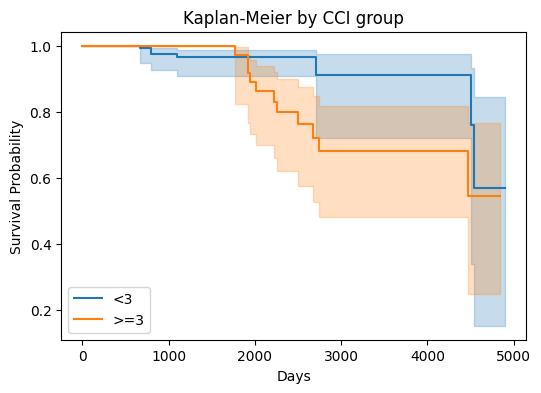

Log-rank test p-value: 0.15266463605334019


<lifelines.CoxPHFitter: fitted with 588 total observations, 570 right-censored observations>
             duration col = 'Day_FU'
                event col = 'Death'
      baseline estimation = breslow
   number of observations = 588
number of events observed = 18
   partial log-likelihood = -60.74
         time fit was run = 2025-08-17 05:47:33 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
CCI        0.05      1.05      0.19           -0.31            0.42                0.73                1.52
Age        0.06      1.06      0.01            0.03            0.09                1.03                1.09

           cmp to    z      p  -log2(p)
covariate                              
CCI          0.00 0.28   0.78      0.37
Age          0.00 3.97 <0.005     13.76
---
Concordance = 0.81
Partial AIC = 125.49
log-likelihood ratio test = 21.59 on 2 df
-log2(p) of ll-ratio test = 15.58

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
from lifelines import KaplanMeierFitter, CoxPHFitter
import statsmodels.api as sm
import statsmodels.formula.api as smf
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# ------------------------------
# 1. 데이터 불러오기
# ------------------------------
bnc = pd.read_csv("nsc2_bnc_1000.csv")
bnd = pd.read_csv("nsc2_bnd_1000.csv")
m20 = pd.read_csv("nsc2_m20_1000.csv")
m30 = pd.read_csv("nsc2_m30_1000.csv")
m40 = pd.read_csv("nsc2_m40_1000.csv")
m60 = pd.read_csv("nsc2_m60_1000.csv")
g1e_0915 = pd.read_csv("nsc2_g1e_0915_1000.csv")
g1e_0208 = pd.read_csv("nsc2_g1e_0208_1000.csv")

# ------------------------------
# 2. g1e 병합 & 전처리
# ------------------------------
g1e = pd.concat([
    g1e_0915[['RN_INDI','HME_YYYYMM','G1E_BP_SYS','G1E_BMI','Q_SMK_YN','G1E_FBS']],
    g1e_0208[['RN_INDI','HME_YYYYMM','G1E_BP_SYS','G1E_BMI','Q_SMK_YN','G1E_FBS']]
], ignore_index=True)

# Indexdate: 월의 시작일
g1e['Indexdate'] = pd.to_datetime(g1e['HME_YYYYMM'], format='%Y%m') + pd.offsets.MonthBegin(-1)

# 최신 기록만
g1e = g1e.sort_values('HME_YYYYMM').groupby('RN_INDI').last().reset_index()

# 결측 제거
g1e = g1e.dropna()

# BMI 범주
def bmi_category(bmi):
    if bmi < 18.5:
        return "<18.5"
    elif bmi < 25:
        return "18.5-25"
    elif bmi < 30:
        return "25-30"
    else:
        return ">=30"
g1e['BMI_cat'] = g1e['G1E_BMI'].apply(bmi_category)

# 흡연 상태
def smoke_status(x):
    if x == 1:
        return "Never"
    elif x == 3:
        return "Current"
    else:
        return "Ex-smoker"
g1e['smoke'] = g1e['Q_SMK_YN'].apply(smoke_status)

# DM 여부
dm_cd = ['E'+str(i) for i in range(10,15)]
g1e['dm'] = g1e['RN_INDI'].isin(
    m40[m40['MCEX_SICK_SYM'].str.contains('|'.join(dm_cd), na=False)]['RN_INDI']
).astype(int)

# 나이 계산
bnd['Deathdate'] = pd.to_datetime(bnd['DTH_YYYYMM'], format='%Y%m', errors='coerce') + pd.offsets.MonthEnd(0)
g1e = g1e.merge(bnd[['RN_INDI','BTH_YYYY']], on='RN_INDI', how='left')
g1e['BTH_YYYY'] = g1e['BTH_YYYY'].astype(str).str[:4]
g1e['Age'] = g1e['HME_YYYYMM'].astype(str).str[:4].astype(int) - g1e['BTH_YYYY'].astype(int)

# ------------------------------
# 3. Logistic regression
# ------------------------------
glm_model = smf.glm('dm ~ smoke + BMI_cat + Age', data=g1e, family=sm.families.Binomial()).fit()
print(glm_model.summary())

# ------------------------------
# 4. CCI 점수 & 그룹 설정
# ------------------------------
# 예시: 실제 코드에서는 모든 ICD 코드 매핑 필요
np.random.seed(0)
data_asd = g1e[['RN_INDI','Indexdate','Age']].copy()
data_asd = data_asd.merge(bnd[['RN_INDI','Deathdate']], on='RN_INDI', how='left')
data_asd['Death'] = (~data_asd['Deathdate'].isna()).astype(int)
data_asd['Day_FU'] = (pd.to_datetime('2015-12-31') - data_asd['Indexdate']).dt.days
data_asd['CCI'] = np.random.randint(0,5,size=len(data_asd))
data_asd['CCI_group'] = np.where(data_asd['CCI']>=3, ">=3","<3")

# ------------------------------
# 5. Kaplan-Meier 생존분석
# ------------------------------
kmf = KaplanMeierFitter()
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
for name, group_df in data_asd.groupby('CCI_group'):
    kmf.fit(group_df['Day_FU'], event_observed=group_df['Death'], label=name)
    kmf.plot_survival_function()
plt.title("Kaplan-Meier by CCI group")
plt.ylabel("Survival Probability")
plt.xlabel("Days")
plt.show()

# Log-rank test
from lifelines.statistics import logrank_test
group1 = data_asd[data_asd['CCI_group']=="<3"]
group2 = data_asd[data_asd['CCI_group']==">=3"]
result = logrank_test(group1['Day_FU'], group2['Day_FU'], event_observed_A=group1['Death'], event_observed_B=group2['Death'])
print("Log-rank test p-value:", result.p_value)

# ------------------------------
# 6. Cox proportional hazards
# ------------------------------
cph = CoxPHFitter()
cph.fit(data_asd[['Day_FU','Death','CCI','Age']], duration_col='Day_FU', event_col='Death')
cph.print_summary()

# ------------------------------
# 7. Excel 저장
# ------------------------------
wb = Workbook()
ws = wb.active
ws.title = "g1e_summary"

for r in dataframe_to_rows(g1e.head(), index=False, header=True):
    ws.append(r)

#wb.save("output.xlsx")
